In [1]:
# !pip install mlrose-hiive
# !pip install chess

In [2]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, NNGSRunner

## Optimization Problem : Queens

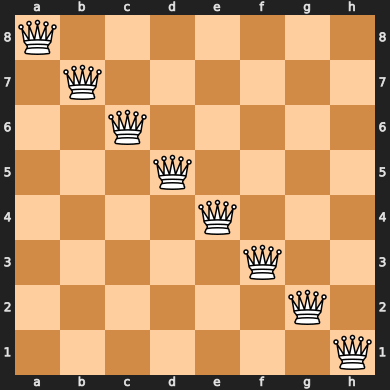

In [3]:
# Generate a new 8-Queen problem using a fixed seed.
problem = QueensGenerator().generate(seed=123456, size=8)

#Initial State
state = [0,1,2,3,4,5,6,7]
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

### Algorithm 1: Randomized Hill Climbing

In [4]:
rhc = RHCRunner(problem=problem,
                    experiment_name='queen8_rhc',
                    output_directory=None,
                    seed=123,
                    iteration_list=2 ** np.arange(11),
                    max_attempts=500,
                    restart_list=[5, 10, 20, 50, 75, 100])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run() 

In [5]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,9.0,0,0.001209,"[6, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
1,1,9.0,1,0.003988,"[6, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
2,2,9.0,2,0.005996,"[6, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
3,4,8.0,5,0.007955,"[1, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
4,8,8.0,9,0.010177,"[1, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
5,16,3.0,21,0.014106,"[1, 5, 4, 2, 0, 2, 6, 2]",5,1024,0
6,32,3.0,37,0.019095,"[1, 5, 4, 2, 0, 2, 6, 2]",5,1024,0
7,64,2.0,70,0.029018,"[1, 7, 4, 2, 0, 2, 6, 2]",5,1024,0
8,128,2.0,134,0.047982,"[1, 7, 4, 2, 0, 2, 6, 2]",5,1024,0
9,256,2.0,262,0.093355,"[1, 7, 4, 2, 0, 2, 6, 2]",5,1024,0


In [6]:
df_run_curves.iloc[:60]

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.001209,9.0,0.0,5,1024,0
1,1,0.003988,9.0,1.0,5,1024,0
2,2,0.005996,9.0,2.0,5,1024,0
3,3,0.007562,9.0,3.0,5,1024,0
4,4,0.007955,8.0,5.0,5,1024,0
5,5,0.009531,8.0,6.0,5,1024,0
6,6,0.009749,8.0,7.0,5,1024,0
7,7,0.009963,8.0,8.0,5,1024,0
8,8,0.010177,8.0,9.0,5,1024,0
9,9,0.011833,8.0,10.0,5,1024,0


In [7]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
1103,25,0.017518,0.0,1116.0,5,1024,2
2207,25,0.017518,0.0,1116.0,10,1024,2
3311,25,0.017518,0.0,1116.0,20,1024,2
4415,25,0.017518,0.0,1116.0,50,1024,2
5519,25,0.017518,0.0,1116.0,75,1024,2
6623,25,0.017518,0.0,1116.0,100,1024,2


In [8]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
1103,25,0.017518,0.0,1116.0,5,1024,2
2207,25,0.017518,0.0,1116.0,10,1024,2
3311,25,0.017518,0.0,1116.0,20,1024,2
4415,25,0.017518,0.0,1116.0,50,1024,2
5519,25,0.017518,0.0,1116.0,75,1024,2
6623,25,0.017518,0.0,1116.0,100,1024,2


In [9]:
best_Restarts = best_curve_run['Restarts'].iloc()[0]

print(f'Best Restarts: {best_Restarts}')

Best Restarts: 5


In [10]:
run_stats_best_run = df_run_stats[df_run_stats['Restarts'] == best_Restarts]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,9.0,0,0.001209,"[6, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
1,1,9.0,1,0.003988,"[6, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
2,2,9.0,2,0.005996,"[6, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
3,4,8.0,5,0.007955,"[1, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
4,8,8.0,9,0.010177,"[1, 5, 6, 2, 4, 2, 6, 1]",5,1024,0
5,16,3.0,21,0.014106,"[1, 5, 4, 2, 0, 2, 6, 2]",5,1024,0
6,32,3.0,37,0.019095,"[1, 5, 4, 2, 0, 2, 6, 2]",5,1024,0
7,64,2.0,70,0.029018,"[1, 7, 4, 2, 0, 2, 6, 2]",5,1024,0
8,128,2.0,134,0.047982,"[1, 7, 4, 2, 0, 2, 6, 2]",5,1024,0
9,256,2.0,262,0.093355,"[1, 7, 4, 2, 0, 2, 6, 2]",5,1024,0


In [11]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
35,1024,0.0,1116,0.819339,"[5, 2, 0, 7, 3, 1, 6, 4]",5,1024,2


In [12]:
opt_curve=df_run_curves[(df_run_curves['Restarts']==best_state['Restarts'].iloc[0]) & (df_run_curves['current_restart']==best_state['current_restart'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
1079,1,0.003988,7.0,1088.0,5,1024,2
1080,2,0.005996,7.0,1089.0,5,1024,2
1081,3,0.007562,7.0,1090.0,5,1024,2
1082,4,0.007955,7.0,1091.0,5,1024,2
1083,5,0.009531,5.0,1093.0,5,1024,2
1084,6,0.009749,5.0,1094.0,5,1024,2
1085,7,0.009963,5.0,1095.0,5,1024,2
1086,8,0.010177,5.0,1096.0,5,1024,2
1087,9,0.011833,5.0,1097.0,5,1024,2
1088,10,0.012115,5.0,1098.0,5,1024,2


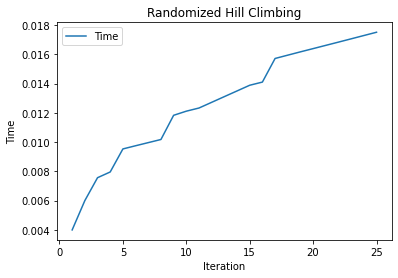

In [13]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('Randomized Hill Climbing')
plt.show()

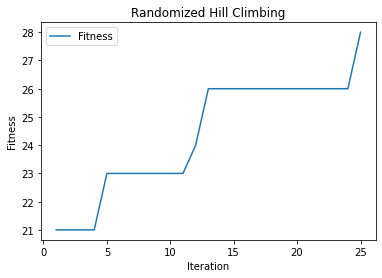

In [14]:
plt.plot(opt_curve['Iteration'],28-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.title('Randomized Hill Climbing')
plt.show()

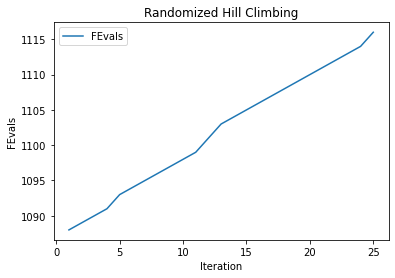

In [15]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('Randomized Hill Climbing')
plt.show()

In [16]:
result1=best_state[['Fitness','FEvals','Time','State']]
result1['Algorithm']='Randomized Hill Climbing'

[5, 2, 0, 7, 3, 1, 6, 4]


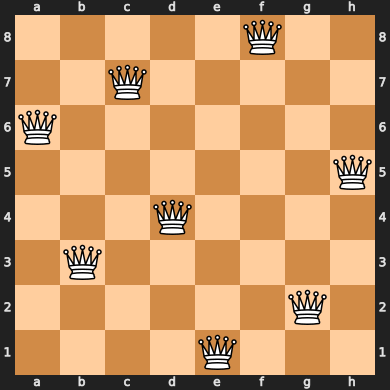

In [17]:
state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

### Algorithm 2: Simulated Annealing

In [18]:
# Generate a new 8-Queen problem using a fixed seed.
problem = QueensGenerator().generate(seed=123456, size=8)

#Initial State
state = [0,1,2,3,4,5,6,7]
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)

In [19]:
# create a runner class and solve the problem
sa = SARunner(problem=problem,
              experiment_name='queens8_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              max_attempts=500,
              temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              decay_list=[mlrose_hiive.GeomDecay])

# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()

In [20]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,11.0,0,0.001169,"[1, 2, 2, 1, 0, 3, 7, 3]",geometric,0.10,0.99,0.001,0.099999,0.1,1024
1,1,9.0,2,0.003739,"[1, 2, 2, 0, 0, 3, 7, 3]",geometric,0.10,0.99,0.001,0.099996,0.1,1024
2,2,8.0,4,0.006144,"[1, 2, 2, 0, 0, 3, 7, 5]",geometric,0.10,0.99,0.001,0.099994,0.1,1024
3,4,8.0,7,0.008331,"[1, 2, 2, 5, 0, 3, 7, 5]",geometric,0.10,0.99,0.001,0.099992,0.1,1024
4,8,5.0,13,0.011061,"[1, 2, 7, 5, 0, 3, 5, 5]",geometric,0.10,0.99,0.001,0.099989,0.1,1024
5,16,4.0,24,0.014911,"[1, 2, 7, 5, 3, 0, 5, 5]",geometric,0.10,0.99,0.001,0.099985,0.1,1024
6,32,4.0,47,0.021349,"[1, 5, 7, 5, 0, 0, 3, 4]",geometric,0.10,0.99,0.001,0.099979,0.1,1024
7,64,1.0,86,0.032011,"[1, 5, 2, 6, 3, 0, 7, 4]",geometric,0.10,0.99,0.001,0.099968,0.1,1024
8,128,1.0,155,0.052472,"[1, 5, 2, 6, 3, 0, 4, 7]",geometric,0.10,0.99,0.001,0.099947,0.1,1024
9,256,1.0,295,0.101335,"[1, 7, 2, 6, 3, 5, 0, 4]",geometric,0.10,0.99,0.001,0.099898,0.1,1024


In [21]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.001169,11.0,0.0,0.1,1024
1,1,0.003739,9.0,2.0,0.1,1024
2,2,0.006144,8.0,4.0,0.1,1024
3,3,0.007907,8.0,5.0,0.1,1024
4,4,0.008331,8.0,7.0,0.1,1024
...,...,...,...,...,...,...
3160,420,0.009623,1.0,578.0,5.0,1024
3161,421,0.009839,1.0,579.0,5.0,1024
3162,422,0.010051,1.0,580.0,5.0,1024
3163,423,0.010425,1.0,581.0,5.0,1024


In [22]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
414,414,0.176237,0.0,461.0,0.1,1024
829,414,0.176237,0.0,461.0,0.5,1024
2416,561,0.061022,0.0,639.0,1.0,1024
2739,322,0.131805,0.0,427.0,2.0,1024
3164,424,0.012406,0.0,583.0,5.0,1024


In [23]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
2739,322,0.131805,0.0,427.0,2.0,1024


In [24]:
best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

print(f'Best initial temperature: {best_init_temperature}')

Best initial temperature: 2.0


In [25]:
run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
48,0,11.0,0,0.000405,"[1, 2, 2, 1, 0, 3, 7, 3]",geometric,2.0,0.99,0.001,1.999992,2.0,1024
49,1,9.0,2,0.004293,"[1, 2, 2, 0, 0, 3, 7, 3]",geometric,2.0,0.99,0.001,1.999914,2.0,1024
50,2,8.0,4,0.008372,"[1, 2, 2, 0, 0, 3, 7, 5]",geometric,2.0,0.99,0.001,1.999832,2.0,1024
51,4,8.0,7,0.012520,"[1, 2, 2, 5, 0, 3, 7, 5]",geometric,2.0,0.99,0.001,1.999748,2.0,1024
52,8,7.0,14,0.017418,"[1, 2, 2, 5, 0, 3, 5, 5]",geometric,2.0,0.99,0.001,1.999650,2.0,1024
53,16,6.0,27,0.023524,"[3, 2, 3, 5, 0, 1, 5, 5]",geometric,2.0,0.99,0.001,1.999527,2.0,1024
54,32,4.0,57,0.036154,"[3, 5, 6, 5, 5, 0, 4, 7]",geometric,2.0,0.99,0.001,1.999273,2.0,1024
55,64,5.0,114,0.052475,"[2, 0, 3, 6, 1, 2, 1, 7]",geometric,2.0,0.99,0.001,1.998945,2.0,1024
56,128,3.0,205,0.078403,"[2, 0, 6, 3, 5, 0, 4, 3]",geometric,2.0,0.99,0.001,1.998425,2.0,1024
57,256,2.0,358,0.131868,"[7, 1, 3, 6, 6, 4, 0, 5]",geometric,2.0,0.99,0.001,1.997351,2.0,1024


In [26]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
59,1024,0.0,427,0.164522,"[7, 1, 3, 0, 6, 4, 2, 5]",geometric,2.0,0.99,0.001,1.996696,2.0,1024


In [27]:
opt_curve=df_run_curves[(df_run_curves['Temperature']==best_state['Temperature'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
2417,0,0.001169,11.0,0.0,2.0,1024
2418,1,0.003739,9.0,2.0,2.0,1024
2419,2,0.006144,8.0,4.0,2.0,1024
2420,3,0.007907,8.0,5.0,2.0,1024
2421,4,0.008331,8.0,7.0,2.0,1024
...,...,...,...,...,...,...
2735,318,0.130042,1.0,422.0,2.0,1024
2736,319,0.130482,1.0,423.0,2.0,1024
2737,320,0.130921,1.0,424.0,2.0,1024
2738,321,0.131363,1.0,425.0,2.0,1024


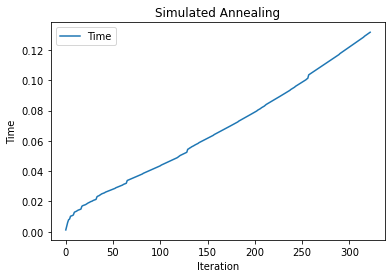

In [28]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('Simulated Annealing')
plt.show()

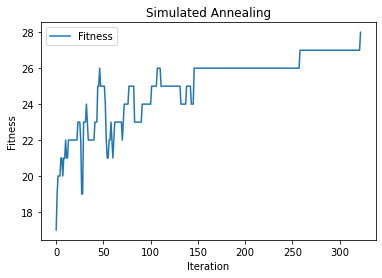

In [29]:
plt.plot(opt_curve['Iteration'],28-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.title('Simulated Annealing')
plt.show()

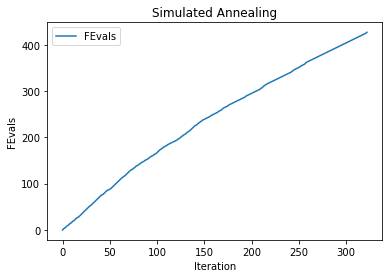

In [30]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('Simulated Annealing')
plt.show()

In [31]:
result2=best_state[['Fitness','FEvals','Time','State']]
result2['Algorithm']='Simulated Annealing'

[7, 1, 3, 0, 6, 4, 2, 5]


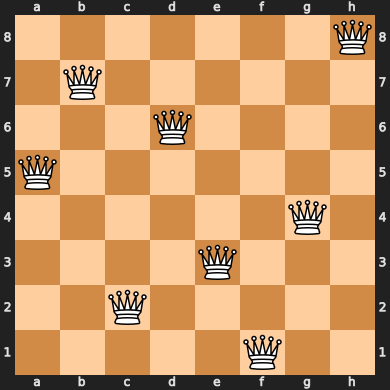

In [32]:
state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

### Algorithm 3: Generic Algorithm

In [33]:
# Generate a new 8-Queen problem using a fixed seed.
problem = QueensGenerator().generate(seed=123456, size=8)

#Initial State
state = [0,1,2,3,4,5,6,7]
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)

In [34]:
ga = GARunner(problem=problem,
                  experiment_name='queen8_ga',
                  output_directory=None,
                  seed=1234,
                  iteration_list=2 ** np.arange(11),
                  max_attempts=500,
                  population_sizes=[10, 20, 50, 100, 150],
                  mutation_rates=[0.1, 0.3, 0.5, 0.7])
                  
# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run() 

In [35]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
0,0,9.0,10,0.003925,"[7, 3, 6, 5, 4, 4, 0, 1]",10,0.1,1024
1,1,5.0,22,0.008109,"[6, 3, 7, 4, 2, 3, 6, 4]",10,0.1,1024
2,2,3.0,34,0.011970,"[6, 3, 7, 1, 3, 0, 6, 4]",10,0.1,1024
3,4,3.0,56,0.018040,"[6, 3, 7, 1, 3, 0, 6, 4]",10,0.1,1024
4,8,2.0,101,0.029180,"[7, 3, 7, 7, 2, 0, 6, 1]",10,0.1,1024
5,16,2.0,189,0.050002,"[7, 3, 7, 7, 2, 0, 6, 1]",10,0.1,1024
6,32,2.0,365,0.089761,"[7, 3, 7, 7, 2, 0, 6, 1]",10,0.1,1024
7,64,2.0,717,0.170049,"[7, 3, 7, 7, 2, 0, 6, 1]",10,0.1,1024
8,128,2.0,1421,0.333599,"[7, 3, 7, 7, 2, 0, 6, 1]",10,0.1,1024
9,256,1.0,2830,0.653443,"[1, 3, 5, 7, 2, 0, 6, 1]",10,0.1,1024


In [36]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003925,9.0,10.0,10,0.1,1024
1,1,0.008109,5.0,22.0,10,0.1,1024
2,2,0.011970,3.0,34.0,10,0.1,1024
3,3,0.015643,3.0,45.0,10,0.1,1024
4,4,0.018040,3.0,56.0,10,0.1,1024
...,...,...,...,...,...,...,...
4796,26,0.075425,1.0,4079.0,150,0.7,1024
4797,27,0.077814,1.0,4230.0,150,0.7,1024
4798,28,0.080186,1.0,4381.0,150,0.7,1024
4799,29,0.082595,1.0,4532.0,150,0.7,1024


In [37]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
397,397,1.028451,0.0,4382.0,10,0.1,1024
1097,35,0.098565,0.0,400.0,10,0.5,1024
1312,214,0.548502,0.0,2370.0,10,0.7,1024
2551,90,0.239017,0.0,1915.0,20,0.5,1024
3085,13,0.042564,0.0,716.0,50,0.1,1024
3410,324,0.834989,0.0,16578.0,50,0.3,1024
3431,20,0.060988,0.0,1073.0,50,0.5,1024
3498,66,0.176075,0.0,3420.0,50,0.7,1024
4051,37,0.103457,0.0,3841.0,100,0.3,1024
4188,136,0.355707,0.0,13840.0,100,0.5,1024


In [38]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1097,35,0.098565,0.0,400.0,10,0.5,1024


In [39]:
best_Population_Size = best_curve_run['Population Size'].iloc()[0]
best_Mutation_Rate = best_curve_run['Mutation Rate'].iloc()[0]
print(f'Best Population: {best_Population_Size}')
print(f'Best Mutation Rate: {best_Mutation_Rate}')

Best Population: 10
Best Mutation Rate: 0.5


In [40]:
run_stats_best_run = df_run_stats[(df_run_stats['Population Size'] == best_Population_Size) & (df_run_stats['Mutation Rate'] == best_Mutation_Rate)]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
24,0,9.0,10,0.002299,"[7, 3, 6, 5, 4, 4, 0, 1]",10,0.5,1024
25,1,5.0,22,0.007514,"[6, 3, 7, 4, 3, 3, 6, 4]",10,0.5,1024
26,2,5.0,33,0.012525,"[6, 3, 7, 4, 3, 3, 6, 4]",10,0.5,1024
27,4,3.0,56,0.020249,"[5, 0, 1, 7, 0, 3, 7, 2]",10,0.5,1024
28,8,2.0,101,0.032214,"[5, 0, 1, 7, 0, 3, 6, 2]",10,0.5,1024
29,16,1.0,190,0.053670,"[5, 0, 4, 7, 0, 3, 6, 2]",10,0.5,1024
30,32,1.0,366,0.094676,"[5, 0, 4, 7, 0, 3, 6, 2]",10,0.5,1024
31,64,0.0,400,0.104406,"[5, 2, 4, 7, 0, 3, 1, 6]",10,0.5,1024
32,128,0.0,400,0.104406,"[5, 2, 4, 7, 0, 3, 1, 6]",10,0.5,1024
33,256,0.0,400,0.104406,"[5, 2, 4, 7, 0, 3, 1, 6]",10,0.5,1024


In [41]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
35,1024,0.0,400,0.104406,"[5, 2, 4, 7, 0, 3, 1, 6]",10,0.5,1024


In [42]:
opt_curve=df_run_curves[(df_run_curves['Population Size']==best_state['Population Size'].iloc[0]) & (df_run_curves['Mutation Rate']==best_state['Mutation Rate'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1062,0,0.003925,9.0,10.0,10,0.5,1024
1063,1,0.008109,5.0,22.0,10,0.5,1024
1064,2,0.011970,5.0,33.0,10,0.5,1024
1065,3,0.015643,5.0,44.0,10,0.5,1024
1066,4,0.018040,3.0,56.0,10,0.5,1024
1067,5,0.021956,3.0,67.0,10,0.5,1024
1068,6,0.024387,2.0,79.0,10,0.5,1024
1069,7,0.026787,2.0,90.0,10,0.5,1024
1070,8,0.029180,2.0,101.0,10,0.5,1024
1071,9,0.032883,2.0,112.0,10,0.5,1024


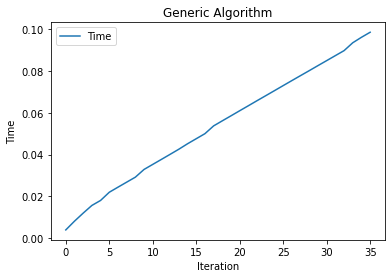

In [43]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('Generic Algorithm')
plt.show()

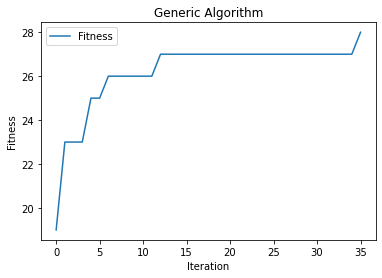

In [44]:
plt.plot(opt_curve['Iteration'],28-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.title('Generic Algorithm')
plt.show()

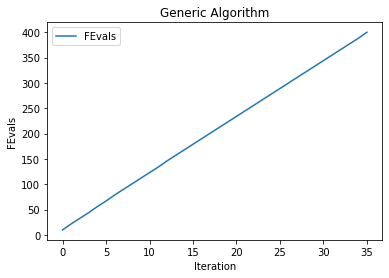

In [45]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('Generic Algorithm')
plt.show()

In [46]:
result3=best_state[['Fitness','FEvals','Time','State']]
result3['Algorithm']='Genetic Algorithm'

[5, 2, 4, 7, 0, 3, 1, 6]


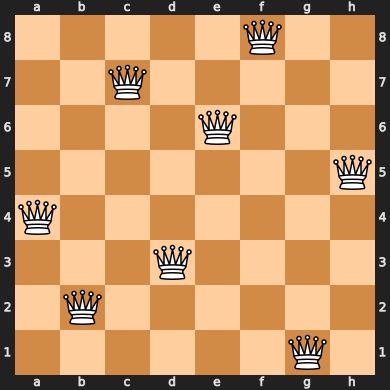

In [47]:
state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

### Algorithm 4: MIMIC

In [48]:
# Generate a new 8-Queen problem using a fixed seed.
problem = QueensGenerator().generate(seed=123456, size=8)

#Initial State
state = [0,1,2,3,4,5,6,7]
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)

In [49]:
mmc = MIMICRunner(problem=problem,
                      experiment_name='queen8_mimic',
                      output_directory=None,
                      seed=12345,
                      iteration_list=2 ** np.arange(11),
                      max_attempts=500,
                      population_sizes=[150, 200],
                      keep_percent_list=[0.25, 0.5, 0.75])
                      
# the two data frames will contain the results
df_run_stats, df_run_curves = mmc.run()

In [50]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,5.0,150,0.029641,"[2, 5, 5, 1, 4, 1, 6, 6]",False,150,0.25,1024
1,1,1.0,302,0.083983,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
2,2,1.0,453,0.139085,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
3,4,1.0,755,0.242127,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
4,8,1.0,1359,0.438445,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
5,16,1.0,2567,0.835138,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
6,32,1.0,4983,1.627820,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
7,64,1.0,9815,3.202659,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
8,128,1.0,19479,6.334970,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
9,256,1.0,38807,12.532158,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024


In [51]:
df_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.029641,5.0,150.0,False,150,0.25,1024
1,1,0.083983,1.0,302.0,False,150,0.25,1024
2,2,0.139085,1.0,453.0,False,150,0.25,1024
3,3,0.191671,1.0,604.0,False,150,0.25,1024
4,4,0.242127,1.0,755.0,False,150,0.25,1024
...,...,...,...,...,...,...,...,...
3022,500,24.228853,1.0,100703.0,False,200,0.75,1024
3023,501,24.276299,1.0,100904.0,False,200,0.75,1024
3024,502,0.026656,1.0,101105.0,False,200,0.75,1024
3025,503,0.076753,1.0,101306.0,False,200,0.75,1024


In [52]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
1,1,0.083983,1.0,302.0,False,150,0.25,1024
2,2,0.139085,1.0,453.0,False,150,0.25,1024
3,3,0.191671,1.0,604.0,False,150,0.25,1024
4,4,0.242127,1.0,755.0,False,150,0.25,1024
5,5,0.294076,1.0,906.0,False,150,0.25,1024
...,...,...,...,...,...,...,...,...
3022,500,24.228853,1.0,100703.0,False,200,0.75,1024
3023,501,24.276299,1.0,100904.0,False,200,0.75,1024
3024,502,0.026656,1.0,101105.0,False,200,0.75,1024
3025,503,0.076753,1.0,101306.0,False,200,0.75,1024


In [53]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
1,1,0.083983,1.0,302.0,False,150,0.25,1024


In [54]:
best_Keep_Percent = best_curve_run['Keep Percent'].iloc()[0]
best_Population_Size = best_curve_run['Population Size'].iloc()[0]
print(f'Best Percent: {best_Keep_Percent}')
print(f'Best Population Size: {best_Population_Size}')

Best Percent: 0.25
Best Population Size: 150


In [55]:
run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_Keep_Percent) & (df_run_stats['Population Size']==best_Population_Size)]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,5.0,150,0.029641,"[2, 5, 5, 1, 4, 1, 6, 6]",False,150,0.25,1024
1,1,1.0,302,0.083983,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
2,2,1.0,453,0.139085,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
3,4,1.0,755,0.242127,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
4,8,1.0,1359,0.438445,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
5,16,1.0,2567,0.835138,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
6,32,1.0,4983,1.627820,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
7,64,1.0,9815,3.202659,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
8,128,1.0,19479,6.334970,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024
9,256,1.0,38807,12.532158,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024


In [56]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
11,1024,1.0,75802,24.276299,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",False,150,0.25,1024


In [57]:
opt_curve=df_run_curves[(df_run_curves['Keep Percent']==best_state['Keep Percent'].iloc[0]) & (df_run_curves['Population Size']==best_state['Population Size'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.029641,5.0,150.0,False,150,0.25,1024
1,1,0.083983,1.0,302.0,False,150,0.25,1024
2,2,0.139085,1.0,453.0,False,150,0.25,1024
3,3,0.191671,1.0,604.0,False,150,0.25,1024
4,4,0.242127,1.0,755.0,False,150,0.25,1024
...,...,...,...,...,...,...,...,...
497,497,24.086509,1.0,75198.0,False,150,0.25,1024
498,498,24.133995,1.0,75349.0,False,150,0.25,1024
499,499,24.181350,1.0,75500.0,False,150,0.25,1024
500,500,24.228853,1.0,75651.0,False,150,0.25,1024


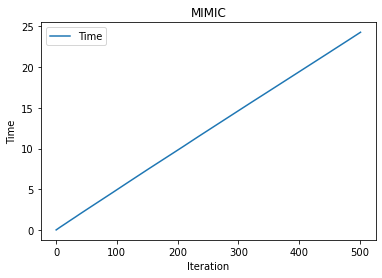

In [58]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('MIMIC')
plt.show()

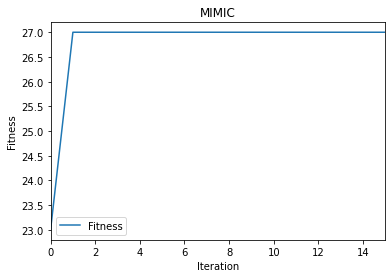

In [59]:
plt.plot(opt_curve['Iteration'],28-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.xlim([0,15])
plt.legend()
plt.title('MIMIC')
plt.show()

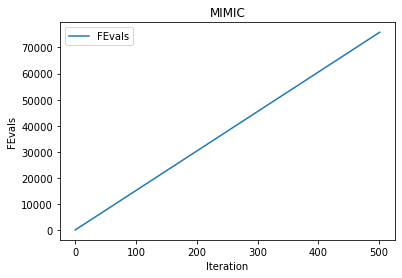

In [60]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('MIMIC')
plt.show()

In [61]:
result4=best_state[['Fitness','FEvals','Time','State']]
result4['Algorithm']='MIMIC'

[7, 4, 1, 3, 0, 6, 3, 5]


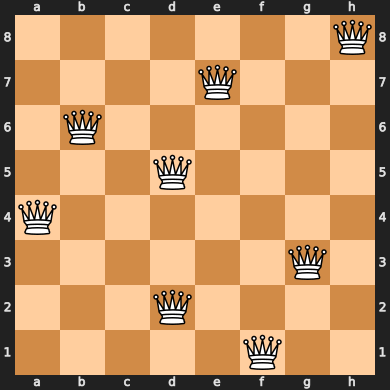

In [62]:
state = [int(i) for i in literal_eval(run_stats_best_run['State'].tail(1).values[0])]
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

### Algorithm Comparison

In [63]:
results=pd.concat([result1,result2,result3,result4])

In [64]:
results['Fitness']=28-results['Fitness']

In [65]:
results

,Fitness,FEvals,Time,State,Algorithm
35,28.0,1116,0.819339,"[5, 2, 0, 7, 3, 1, 6, 4]",Randomized Hill Climbing
59,28.0,427,0.164522,"[7, 1, 3, 0, 6, 4, 2, 5]",Simulated Annealing
35,28.0,400,0.104406,"[5, 2, 4, 7, 0, 3, 1, 6]",Genetic Algorithm
11,27.0,75802,24.276299,"[7.0, 4.0, 1.0, 3.0, 0.0, 6.0, 3.0, 5.0]",MIMIC
